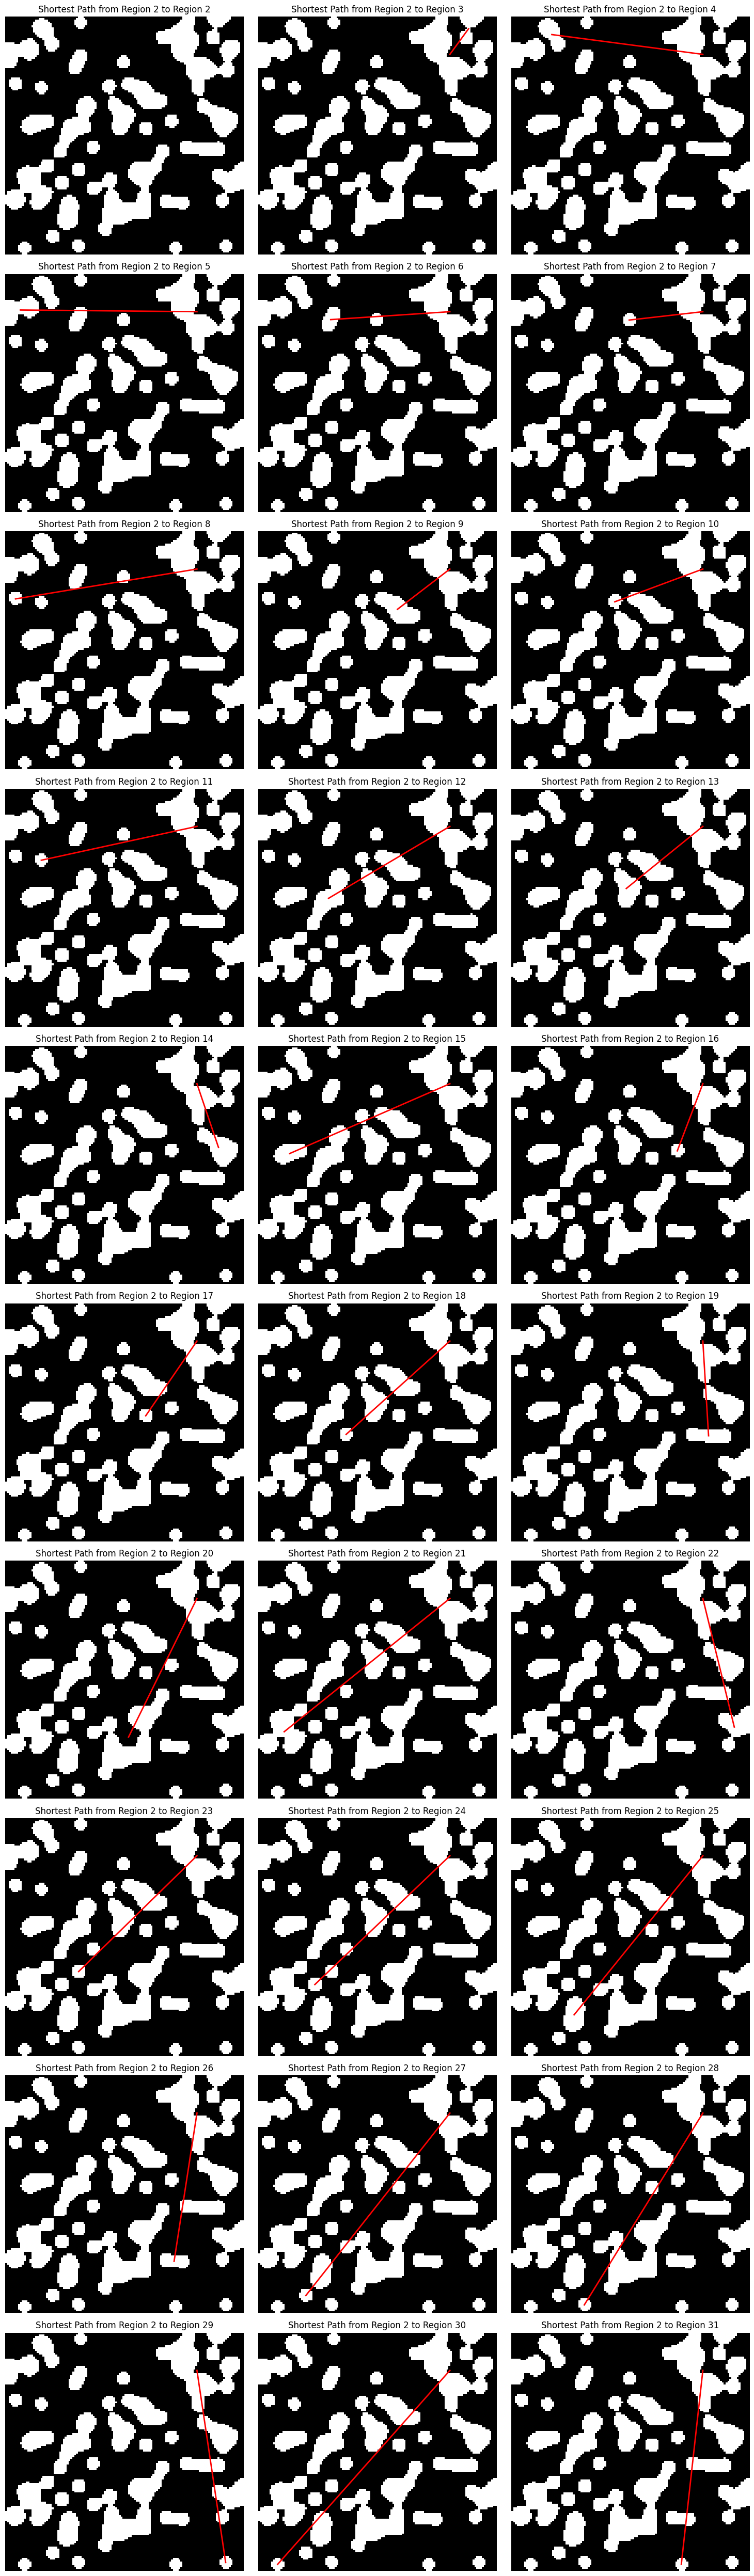

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from skimage import data, color, measure

image = data.binary_blobs(length=128, volume_fraction=0.3, n_dim=2, seed=42)

labeled_image = measure.label(image, connectivity=2)
regions = measure.regionprops(labeled_image)
G = nx.Graph()
for region in regions:
    G.add_node(region.label, centroid=region.centroid)

for region1 in regions:
    for region2 in regions:
        if region1.label != region2.label:
            distance = np.linalg.norm(np.array(region1.centroid) - np.array(region2.centroid))
            G.add_edge(region1.label, region2.label, weight=distance)

end_range = range(2, len(regions) + 1)

num_rows = int(np.ceil(len(end_range) / 3))
plt.figure(figsize=(15, 5 * num_rows))

for i, end_node in enumerate(end_range, start=1):
    plt.subplot(num_rows, 3, i)


    shortest_path = nx.shortest_path(G, source=2, target=end_node, weight='weight')


    plt.imshow(image, cmap='gray')


    for j in range(len(shortest_path) - 1):
        label1 = shortest_path[j]
        label2 = shortest_path[j + 1]
        centroid1 = G.nodes[label1]['centroid']
        centroid2 = G.nodes[label2]['centroid']
        plt.plot([centroid1[1], centroid2[1]], [centroid1[0], centroid2[0]], color='red', linewidth=2)

    plt.title('Shortest Path from Region 2 to Region {}'.format(end_node))
    plt.axis('off')

plt.tight_layout()
plt.show()
